# The Sparks Foundation (GRIPJAN22)
## Sandeep Kumar
### Task 2 - Prediction Using Unsupervised ML (Iris data set)
### IDE - Jupyter Notebook
### Language - Python

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Importing Dataset of Iris

In [4]:
ir = pd.read_csv('Iris.csv')

In [5]:
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
ir.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Dropping Duplicates

In [9]:
ir.drop_duplicates(inplace=True)

In [11]:
ir.shape

(150, 6)

In [12]:
ir.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [13]:
ir.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [14]:
ir.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
ir.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
ir.mean()

<ipython-input-23-1bd97c6250cb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ir.mean()


Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

In [25]:
ir.median()

<ipython-input-25-e49c584ca9ec>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ir.median()


Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [26]:
ir.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [27]:
ir.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [28]:
ir['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [30]:
ir.sort_values(by = 'SepalLengthCm')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
13,14,4.3,3.0,1.1,0.1,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...,...
122,123,7.7,2.8,6.7,2.0,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica


### Data Visualization

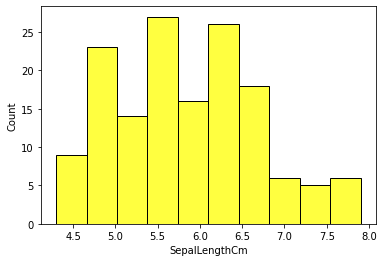

In [33]:
sns.histplot(ir['SepalLengthCm'],color ="yellow",bins = 10)
plt.show()

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

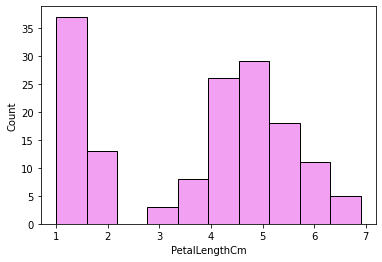

In [35]:
sns.histplot(ir['PetalLengthCm'],color ="violet",bins = 10)

c:\users\sandeep yadav\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


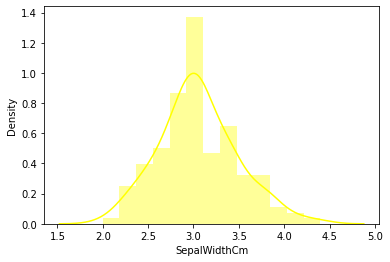

In [37]:
sns.distplot(ir['SepalWidthCm'],color='yellow')
plt.show()

### VISUALIZATION OF WHOLE IRIS DATA SET BY SEABORN(sns)

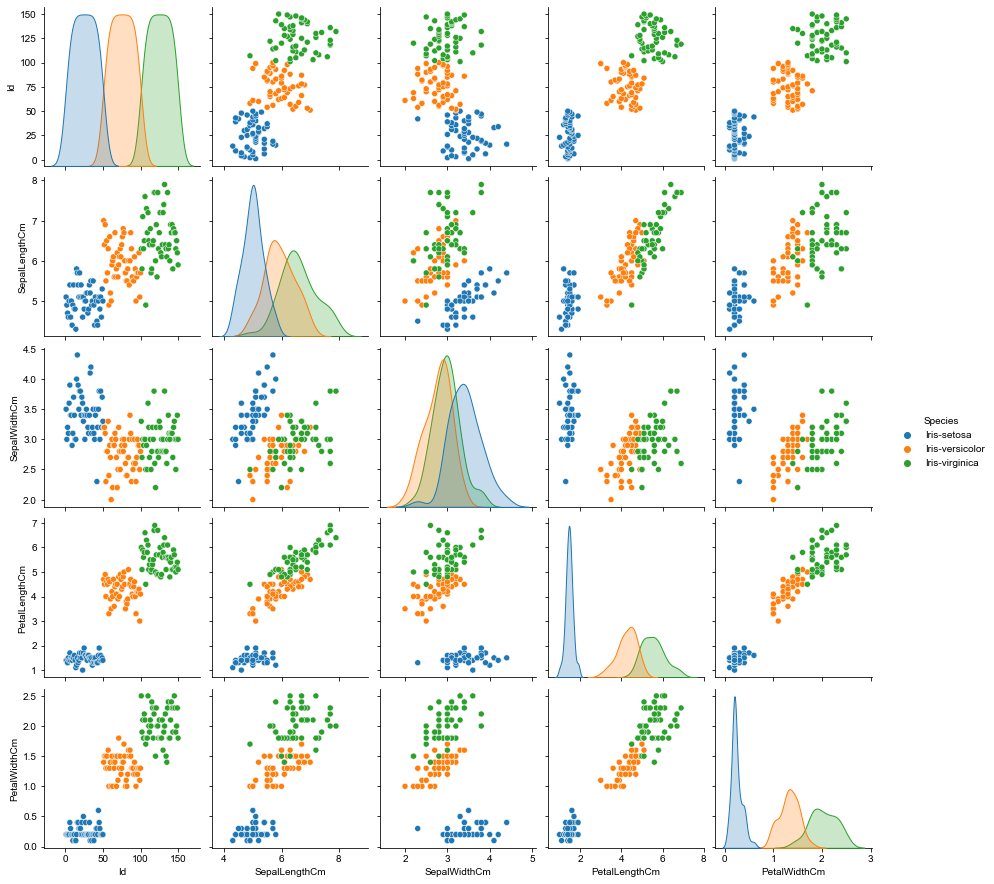

In [39]:
sns.pairplot(ir, hue='Species')
sns.set_style("whitegrid")
plt.show()

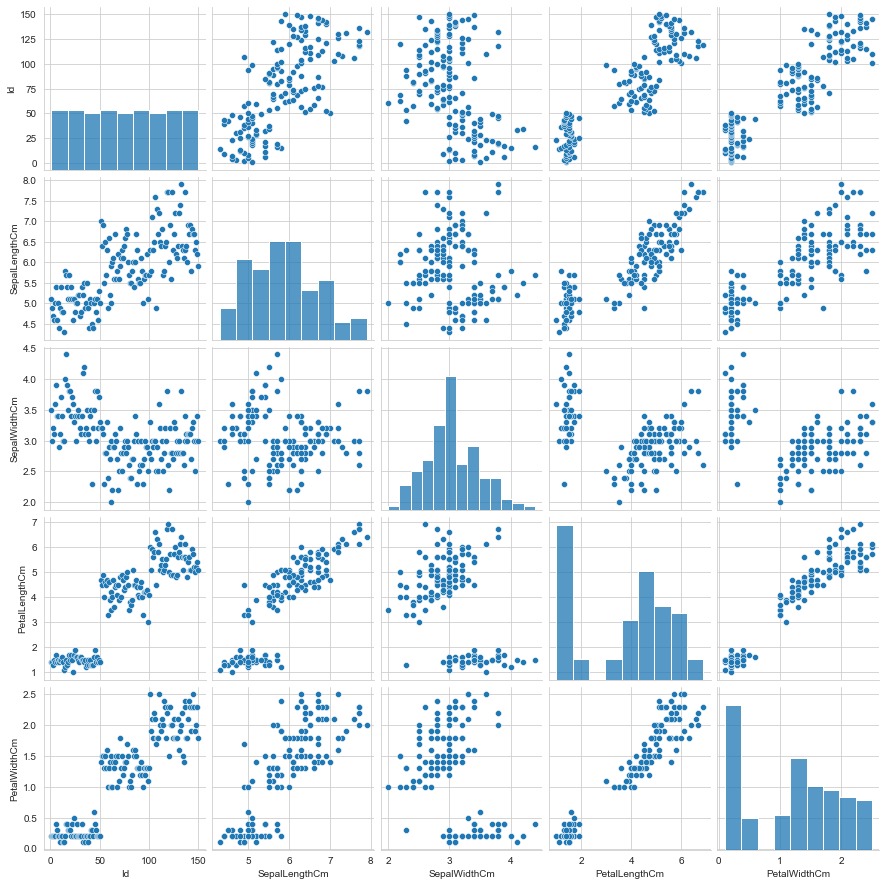

In [41]:
sns.pairplot(data=ir.drop(columns=['Species']))

### Correlation

In [42]:
ir.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### HeatMap

<AxesSubplot:>

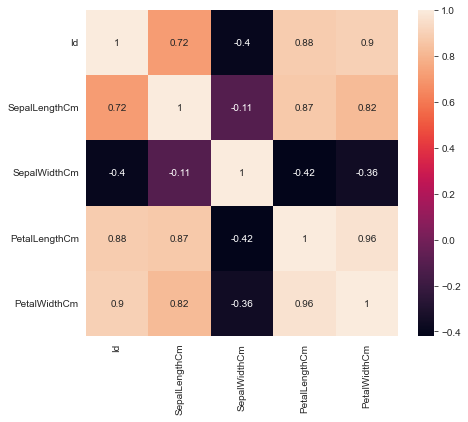

In [43]:
corr = ir.corr()
fig , ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr,annot = True)

### Detarmining the value of K

In [45]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ir['Species']= label_encoder.fit_transform(ir['Species']) 
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ir)

pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5
count,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,0.000000,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16,-1.421085e-16
std,1.003350,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.720542,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,-1.224745e+00
25%,-0.860271,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,-1.224745e+00
50%,0.000000,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,0.000000e+00
75%,0.860271,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,1.224745e+00
max,1.720542,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00,1.224745e+00


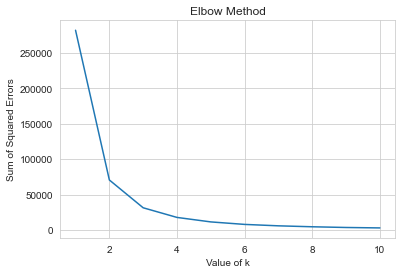

In [53]:
x = ir.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
sse = []

for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(x)
    sse.append(km.inertia_)
    
plt.plot(range(1,11), sse)
plt.xlabel("Value of k")
plt.ylabel("Sum of Squared Errors")
plt.title("Elbow Method")
plt.show()

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)